In [9]:
from matplotlib import pyplot as plt
import numpy as np

from modules import calib

In [10]:
DIR = "surface/"

In [11]:
x = calib.px2mm(np.linspace(693, -46, 32))
x = x[:-2]

ave_dx = []
std_dx = []

for i in range(11):
    idx = 10 + 5 * i
    ave_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"ave_{idx}_dx.csv", delimiter=',')[:-2])))
    std_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"ave_{idx}_dx.csv", delimiter=',')[:-2])))

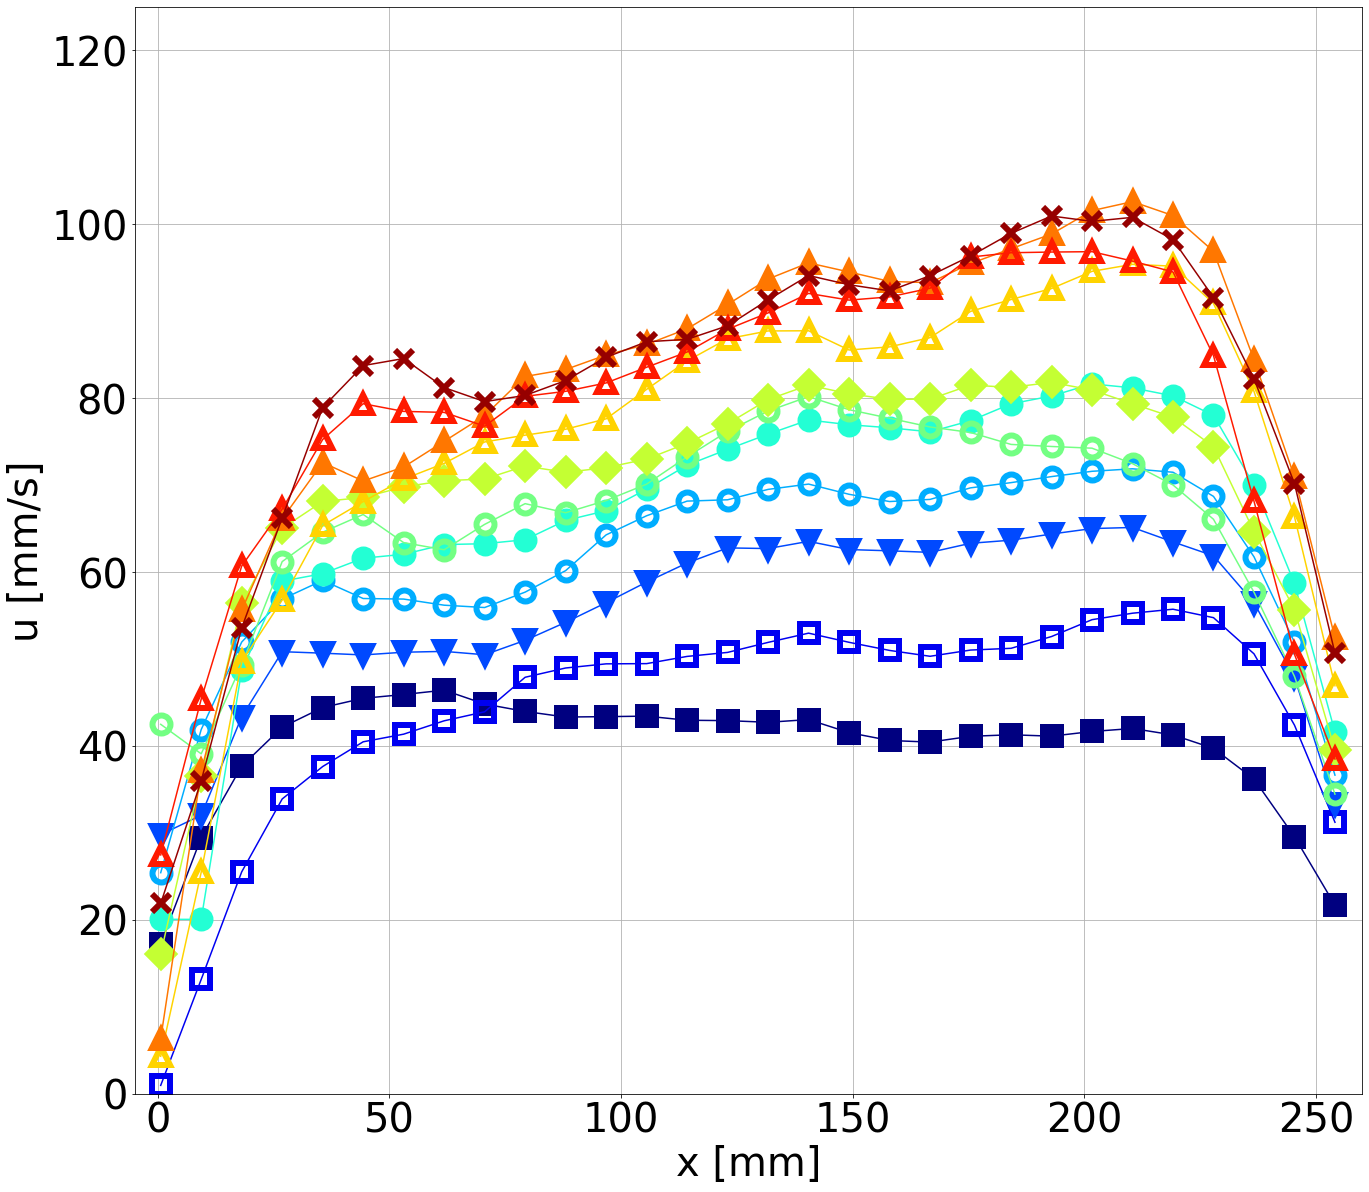

In [13]:
fig, ax = plt.subplots(figsize=(22, 20))
c = plt.get_cmap('jet')
m = ["s", "v", "o", "D", "^", "x"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("x [mm]", fontsize=40)
plt.ylabel("u [mm/s]", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

for i in range(11):
    ax.plot(x, -ave_dx[i], color=c(i*25), lw=1.5)
    if i % 2 == 0:
        ax.plot(x, -ave_dx[i], m[round(i/2)], color=c(i*25), label=f"{1 + 0.5 * i} L/min", markersize=18, markeredgewidth=6)
    else:
        ax.plot(x, -ave_dx[i], m[round(i/2)], color='none', markeredgecolor=c(i*25), label=f"{1 + 0.5 * i} L/min", markersize=18, markeredgewidth=6)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_nonlegend.png", dpi=300)
# plt.show()